<center>
<img src="https://i.imgur.com/DW7NRwf.png" title="ElementalsAI" width=80%/>
</center>

# Introduction

Deep Learning has been very successful in solving many complex problems in the real world. However, solving most of these challenges requires data. Additionally, having data is not just enough. The data has to be cleansed, annotated, and organized. Moreover, data in many domains is not accessible due to privacy constraints (Especially in the medical domain). Hence it becomes pertinent to create models that can learn from a limited amount of data.

<br>

## Problem Statement:
In this task, you are given a small dataset of the microscopic view of the cells.

*Your goal is to build a model that accurately predicts the cell regions as shown in the **Label Image**.*

#### **Input Image**

<a href="https://imgur.com/aLDNHwu"><img src="https://i.imgur.com/aLDNHwu.png" title="source: imgur.com" /></a>

#### **Label Image**

<a href="https://imgur.com/s1mIkFE"><img src="https://i.imgur.com/s1mIkFE.png" title="source: imgur.com" /></a>


## Dataset:

The dataset contains 30 training images along with the labels.

[**Dataset Link**](https://drive.google.com/drive/folders/1678Tggykj46SpJZS9mKMKHw7YFmiGMc8?usp=sharing)


## Evaluation

Share the submission Jupyter/Colab notebook with the relevant explanation. code and models. We will evaluate your model on our **test dataset**.

<br><br>
****Note that this is an interview assignment & is not involved in the development of any software or solution.**

### Instructions

1. Make a copy of this notebook to start editing & add your solution.
2. A dataset folder has been shared with you to train and test.
2. You can use any framework to develop the solution (Pytorch, Keras, Tensorflow, Theano, Caffe etc.).
3. This assignment is a great medium to get to know you better. Please feel free to connect, interact & develop the solution. I would be more than willing to help you out in any issues or problems that you face while solving the challenge. You can connect with me at suraj.donthi@elementals.ai.
4. The goal of this task is to understand how you approach solving a problem. The more you connect while developing the solution the better I will be able to understand you.
5. Submission Files:
    - Colab Notebook Link with Solutions Approach and Code Solution.
    - Trained Model Link.
    - Any other necessary files.
5. **Submission deadline: Within 5 days of recieving the assignment, no later than 12 AM IST on the due date. The exact due date shall be mentioned in the email or the portal where you recieve the assignment.** (You can share the Colab Notebook to the gmail address surajdonthi.th@gmail.com)

## Explain the technique you will use to solve the problem in detail.

- Include any model architectures, equations, diagrams etc. that is required to explain how you are going to solve the problem.

```





```
================== `Your answer here. (Double click to edit)` ==================

## Implement the solution below.

In [13]:
# Your code here.

### Imports

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

DEBUG = True
CMAP = 'magma'

In [15]:
def normalize_nd(arr):
    return (arr - np.amin(arr))/(np.amax(arr) - np.amin(arr))

In [16]:
def filepath_to_ndarray(path):
    output = []
    file_list = list(os.listdir(path))
    file_list.sort(key=lambda x: int(x.split(".")[0].split("_")[1]))
    if DEBUG: print(file_list)
    for file in file_list:
        image = cv2.imread(f'{path}\\{file}',cv2.IMREAD_GRAYSCALE)
        output.append(normalize_nd(np.asarray(image,dtype = np.float64)))
    return np.array(output)
    

In [17]:
volume_path = "trainset\\train-volume"
labels_path = "trainset\\train-labels"
X = filepath_to_ndarray(volume_path)
Y = filepath_to_ndarray(labels_path)

['train-volume_0.tif', 'train-volume_1.tif', 'train-volume_2.tif', 'train-volume_3.tif', 'train-volume_4.tif', 'train-volume_5.tif', 'train-volume_6.tif', 'train-volume_7.tif', 'train-volume_8.tif', 'train-volume_9.tif', 'train-volume_10.tif', 'train-volume_11.tif', 'train-volume_12.tif', 'train-volume_13.tif', 'train-volume_14.tif', 'train-volume_15.tif', 'train-volume_16.tif', 'train-volume_17.tif', 'train-volume_18.tif', 'train-volume_19.tif', 'train-volume_20.tif', 'train-volume_21.tif', 'train-volume_22.tif', 'train-volume_23.tif', 'train-volume_24.tif', 'train-volume_25.tif', 'train-volume_26.tif', 'train-volume_27.tif', 'train-volume_28.tif', 'train-volume_29.tif']
['train-labels_0.tif', 'train-labels_1.tif', 'train-labels_2.tif', 'train-labels_3.tif', 'train-labels_4.tif', 'train-labels_5.tif', 'train-labels_6.tif', 'train-labels_7.tif', 'train-labels_8.tif', 'train-labels_9.tif', 'train-labels_10.tif', 'train-labels_11.tif', 'train-labels_12.tif', 'train-labels_13.tif', 'train

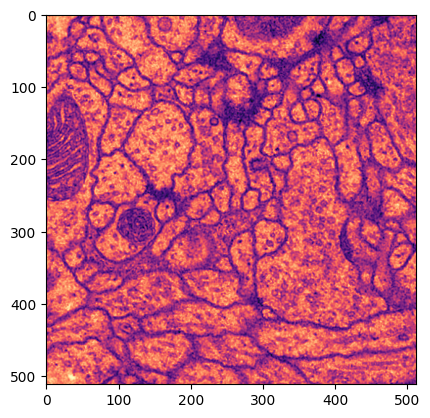

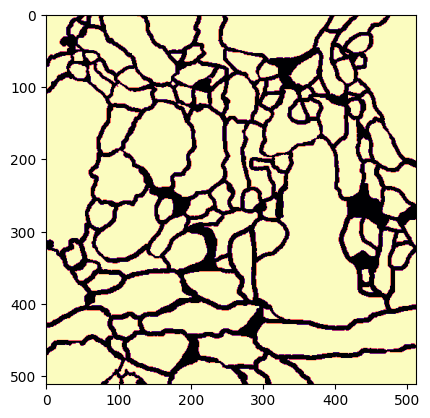

In [18]:
plt.imshow(X[10], cmap=CMAP); plt.show()
plt.imshow(Y[10], cmap=CMAP); plt.show()

In [19]:
# edges = cv2.Canny(np.uint8(volume[10]), threshold1=280, threshold2=400)
# plt.imshow(edges,cmap=CMAP); plt.show()
# plt.imshow(np.uint8(volume[10]), cmap=CMAP); plt.show()

In [20]:


# def unet(input_shape):
#     inputs = Input(input_shape)

#     # Encoder
#     conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     # Middle
#     conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

#     # Decoder
#     up4 = UpSampling2D(size=(2, 2))(conv3)
#     up4 = Conv2D(128, 2, activation='relu', padding='same')(up4)
#     merge4 = concatenate([conv2, up4], axis=3)
#     conv4 = Conv2D(128, 3, activation='relu', padding='same')(merge4)
#     conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

#     up5 = UpSampling2D(size=(2, 2))(conv4)
#     up5 = Conv2D(64, 2, activation='relu', padding='same')(up5)
#     merge5 = concatenate([conv1, up5], axis=3)
#     conv5 = Conv2D(64, 3, activation='relu', padding='same')(merge5)
#     conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

#     # Output layer
#     outputs = Conv2D(1, 1, activation='sigmoid')(conv5)

#     model = Model(inputs=inputs, outputs=outputs)
#     return model

In [21]:
def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Middle
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv2)

    # Decoder
    up3 = UpSampling2D(size=(2, 2))(conv2)
    up3 = Conv2D(32, 2, activation='relu', padding='same')(up3)
    merge3 = concatenate([conv1, up3], axis=3)
    conv3 = Conv2D(32, 3, activation='relu', padding='same')(merge3)
    conv3 = Conv2D(32, 3, activation='relu', padding='same')(conv3)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv3)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2], 1))
Y_train = np.reshape(Y_train, (Y_train.shape[0],Y_train.shape[1],Y_train.shape[2], 1))


# Model creation
input_shape = X_train[0].shape
model = unet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X_train, Y_train, batch_size=3, epochs=10, validation_data=(X_val, Y_val))

# Model evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/10
8/8 [==============================] - 29s 4s/step - loss: 0.6291 - accuracy: 0.7017 - val_loss: 0.4779 - val_accuracy: 0.7801
Epoch 2/10
8/8 [==============================] - 27s 3s/step - loss: 0.4948 - accuracy: 0.7798 - val_loss: 0.4981 - val_accuracy: 0.7801
Epoch 3/10
8/8 [==============================] - 30s 4s/step - loss: 0.4741 - accuracy: 0.7798 - val_loss: 0.4597 - val_accuracy: 0.7801
Epoch 4/10
8/8 [==============================] - 28s 3s/step - loss: 0.4533 - accuracy: 0.7798 - val_loss: 0.4459 - val_accuracy: 0.7801
Epoch 5/10
8/8 [==============================] - 28s 3s/step - loss: 0.4285 - accuracy: 0.7799 - val_loss: 0.4076 - val_accuracy: 0.7815
Epoch 6/10
8/8 [==============================] - 27s 3s/step - loss: 0.3862 - accuracy: 0.7930 - val_loss: 0.3811 - val_accuracy: 0.8218
Epoch 7/10
8/8 [==============================] - 27s 3s/step - loss: 0.3407 - accuracy: 0.8309 - val_loss: 0.3543 - val_accuracy: 0.8273
Epoch 8/10
8/8 [==================

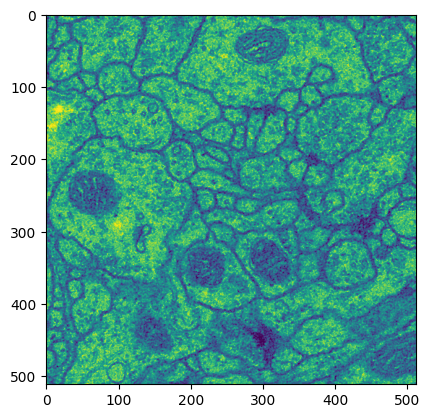

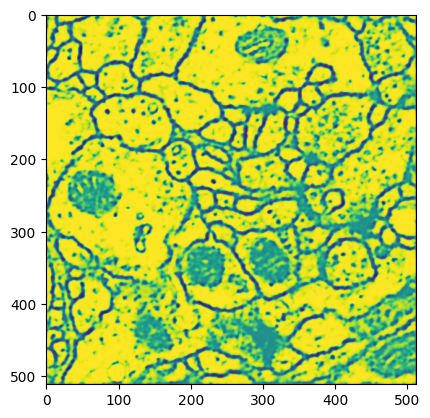

In [28]:
plt.imshow(X_test[0]); plt.show()
plt.imshow(predictions[0]); plt.show()